# Optimizer usage

In [12]:
from blackbox_optimizer.optimizer import RBF
import numpy as np


def quadratic_func(x, proc_ind, kwargs):
    """
    Example objective: f(x) = (x-2)^2 + (x+3)^2
    Returns sum of squares in all dimensions.
    """
    return np.sum((x - np.array([2, -3])) ** 2)


if __name__ == "__main__":
    # Define 2D bounds for search: both dims in [−10, 10]
    bounds = np.array([[-10, 10], [-10, 10]])

    # Instantiate optimizer without initial samples:
    optimizer = RBF(
        X=None,
        y=None,
        bounds=bounds,
        main_func=quadratic_func,
        num_processes=4,
        max_alpha=5,
        dropout=0.1,
        max_polynom_dim=2,
        reg_coeff=1e-6,
        start_steps=5,  # gather 5 random points to initialize
        minimizer_kwargs={},  # additional SciPy kwargs if needed
    )

    # Run the optimization loop (up to 20 iterations or until tol)
    best_point = optimizer.find_optimum(max_iter=20, min_val=1e-3)

    # Scale back to original space (if needed) and print
    original_point = optimizer.scaler.x_inv_scale(best_point)
    best_value = optimizer.predict(original_point.reshape(1, -1), scale_X=True)
    print(f"\nEstimated minimum at {original_point}, value = {best_value[0]:.6f}")

alpha: 0.0
alpha: 1.25
alpha: None
alpha: 5.0
New best result 5.77533041926687e-22 at [ 2. -3.]
Iteration 0 is over!
[0.17378061 0.21804623 0.16858975 0.16701688 0.58448075 0.47376937
 0.17604478 0.36475419 0.21967432 0.16081922 0.03412564 0.53878442
 0.32175225 0.1621976  0.14568111 0.31464675 0.0863124  0.17065842
 0.63923245 0.02796569 0.         0.02715897 0.71537872 1.        ]
Current best result: 5.77533041926687e-22
Iterations took 1 step
Final result: [5.77533042e-22] at point [ 2. -3.]
alpha: 0
Stable result: [-7.92571043e-12] at point [ 2. -3.]

Estimated minimum at [ 2. -3.], value = -0.000000


# Multilayer example

In [1]:
from multilayer_tools.create_scenes.multilayer import create_multilayer
import numpy as np
from time import sleep

In [18]:
from multilayer_tools.create_scenes.multilayer import create_multilayer

if __name__ == "__main__":
    types_number = 4
    atomic_mass = 50
    # Define parameters for a 3-layer stack:
    params = {
        "file_name": "./multilayer.data",  # output LAMMPS data
        "types_number": types_number,  # three distinct FCC scales
        "width": (50, 50, 4),  # base box in unit cells
        "fcc_period": 3.615,  # lattice constant = 3.615
        "masses": [
            atomic_mass * 2 ** (3 * i) for i in range(types_number)
        ],  # atomic masses per layer
    }

    # Create multilayer in LAMMPS
    lmp_interface = create_multilayer(index=0, **params)
    # and then proceed with this object
    # with PyLammps interface

LAMMPS (29 Aug 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
LAMMPS output is captured by PyLammps wrapper
Lattice spacing in x,y,z = 3.615 3.615 3.615
Total wall time: 0:00:00
LAMMPS (29 Aug 2024)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
LAMMPS output is captured by PyLammps wrapper
New upper layer on 12.5525 12.7525
New upper layer on 40.032200363296944 42.64584536329695
New upper layer on 81.63421812482835 115.78991905495334
New upper layer on -9.719032350712837 436.6353524368701

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Total wall time: 0:01:26


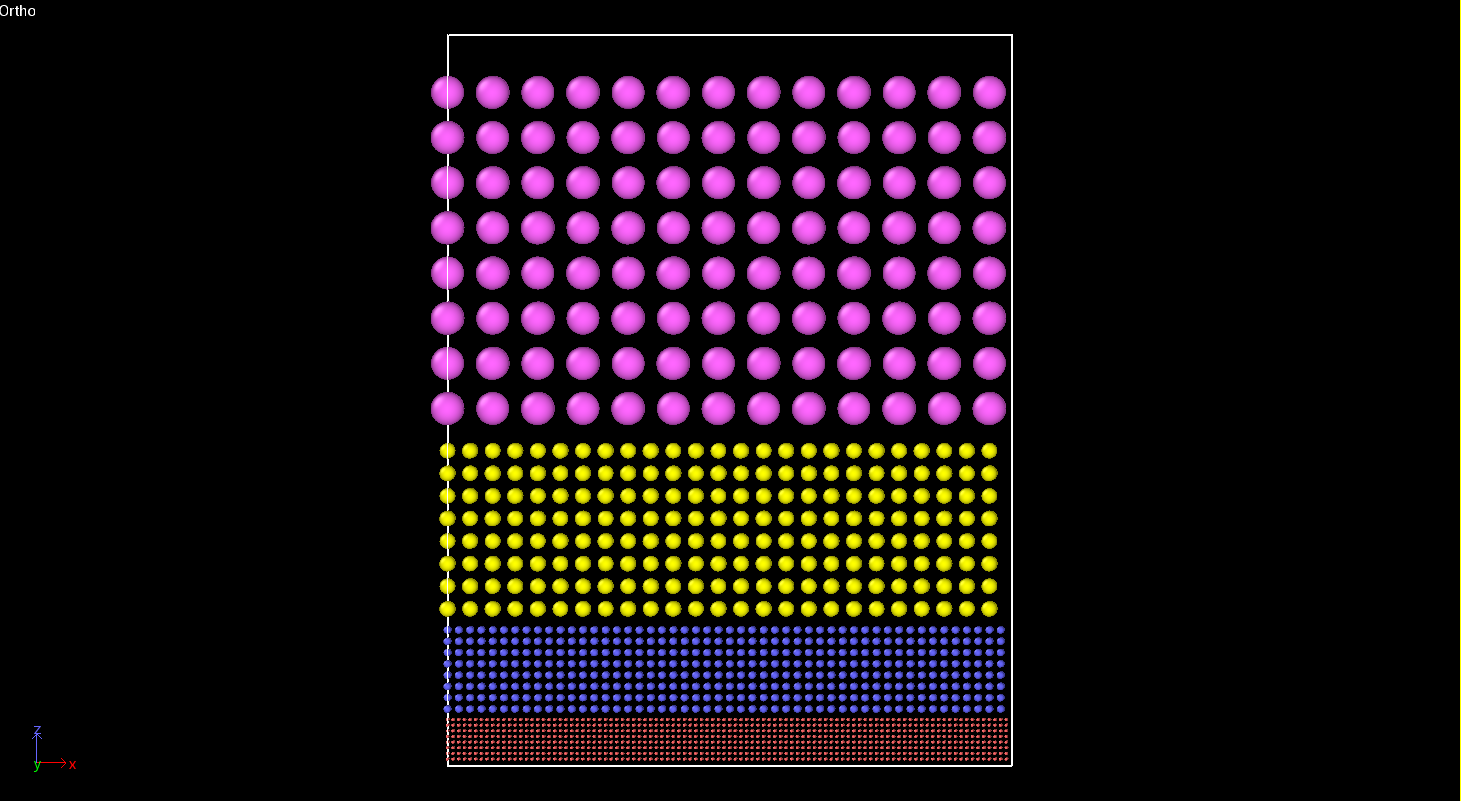

In [20]:
from IPython.display import Image, display

# Display image
display(Image(filename="multilayer.png"))